In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataset=pd.read_csv("train_set.tsv", sep='\t', header=0)
dataset_numpy=dataset.to_numpy()
x=dataset_numpy[:,:-2]
y=dataset_numpy[:,-2:]



In [17]:

scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)





In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750, 35) (750, 2) (250, 35) (250, 2)


In [66]:
#if you want to undersample the data doenst work because i've not too much data 
from imblearn.under_sampling import RandomUnderSampler
over_sampler = RandomUnderSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train[:,0])
y_train=y_train.reshape(-1,1)

In [58]:
#if you want to oversample i dont think it's a good idea because i've not too much data 
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
x_train, y_train = over_sampler.fit_resample(x_train, y_train[:,0])
y_train=y_train.reshape(-1,1)


In [74]:
#evaluate label weights
from collections import Counter
c=Counter(y_train[:,0])
for k,v in c.items():
    c[k]=v/len(y_train)
print(c)

Counter({0.0: 0.2, 1.0: 0.2, 2.0: 0.2, 3.0: 0.2, 4.0: 0.2})


In [67]:
def classificationResults(x_train,x_test,y_train,y_test,model):
    if y_train.shape[1]>1:
        model.fit(x_train,y_train[:,0])
        y_pred_train=model.predict(x_train)
        y_pred_test=model.predict(x_test)
        print("Train F1 score: ",f1_score(y_train[:,0],y_pred_train,average='micro'))
        print("Train Precision score: ",precision_score(y_train[:,0],y_pred_train,average='micro'))
        print("Train Recall score: ",recall_score(y_train[:,0],y_pred_train,average='micro'))
        print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
        print("\nConfusion Matrix test:")

        cm = confusion_matrix(y_test[:,0], y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
    else:
        model.fit(x_train,y_train)
        y_pred_train=model.predict(x_train)
        y_pred_test=model.predict(x_test)
        print("Train F1 score: ",f1_score(y_train,y_pred_train,average='micro'))
        print("Train Precision score: ",precision_score(y_train,y_pred_train,average='micro'))
        print("Train Recall score: ",recall_score(y_train,y_pred_train,average='micro'))
        print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
        print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
        print("\nConfusion Matrix test:")

        cm = confusion_matrix(y_test[:,0], y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()


In [5]:
def regressionResults(x_train,x_test,y_train,y_test,model):
    model.fit(x_train,y_train[:,1])
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train MSE: ",np.mean((y_train[:,1]-y_pred_train)**2))
    print("Train MAE: ",np.mean(np.abs(y_train[:,1]-y_pred_train)))
    print("Test MSE: ",np.mean((y_test[:,1]-y_pred_test)**2))
    print("Test MAE: ",np.mean(np.abs(y_test[:,1]-y_pred_test)))
    

Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.18
Test Precision score:  0.18
Test Recall score:  0.18

Confusion Matrix test:


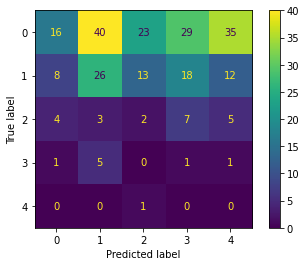

In [68]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

#there is a lot of overfitting because decision trees try to memorize the dataset so i try to use random forest to tackle this problem 

C:\Users\morel\AppData\Local\Temp\ipykernel_2668\1759291749.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.172
Test Precision score:  0.172
Test Recall score:  0.172

Confusion Matrix test:


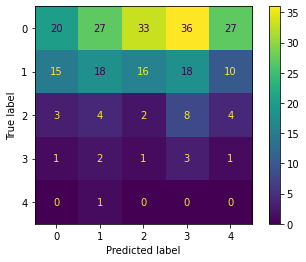

In [69]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)



c:\Users\morel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.232
Test Precision score:  0.232
Test Recall score:  0.232

Confusion Matrix test:


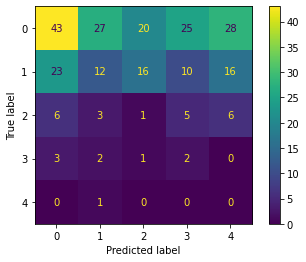

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
classificationResults(x_train,x_test,y_train,y_test,model)

c:\Users\morel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train F1 score:  0.5140740740740741
Train Precision score:  0.5140740740740741
Train Recall score:  0.5140740740740741
Test F1 score:  0.308
Test Precision score:  0.308
Test Recall score:  0.308

Confusion Matrix test:


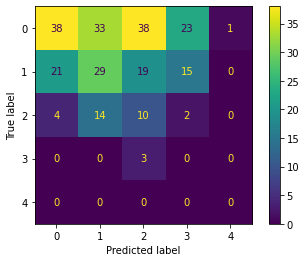

In [63]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classificationResults(x_train,x_test,y_train,y_test,model)

c:\Users\morel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train F1 score:  0.9451851851851852
Train Precision score:  0.9451851851851852
Train Recall score:  0.9451851851851852
Test F1 score:  0.452
Test Precision score:  0.452
Test Recall score:  0.452

Confusion Matrix test:


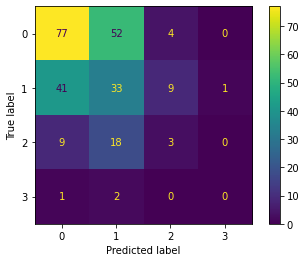

In [64]:
from sklearn import svm
model=svm.SVC()
classificationResults(x_train,x_test,y_train,y_test,model)

c:\Users\morel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\morel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

Train F1 score:  0.616
Train Precision score:  0.616
Train Recall score:  0.616
Test F1 score:  0.484
Test Precision score:  0.484
Test Recall score:  0.484

Confusion Matrix test:


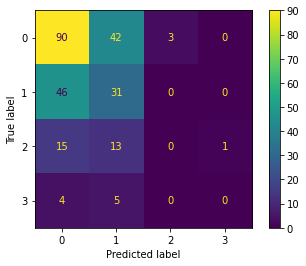

In [103]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.44666666666666666
Train Precision score:  0.44666666666666666
Train Recall score:  0.44666666666666666
Test F1 score:  0.468
Test Precision score:  0.468
Test Recall score:  0.468

Confusion Matrix test:


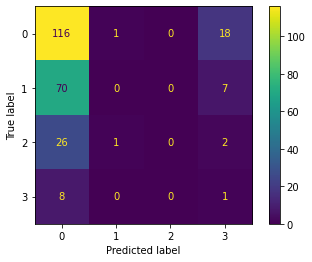

In [97]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.976
Train Precision score:  0.976
Train Recall score:  0.976
Test F1 score:  0.512
Test Precision score:  0.512
Test Recall score:  0.512

Confusion Matrix test:


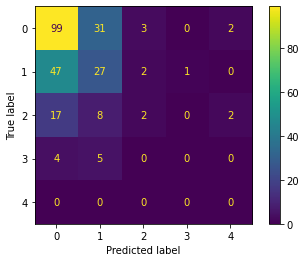

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

In [100]:
model=tree.DecisionTreeRegressor()
regressionResults(x_train,x_test,y_train,y_test,model)

Train MSE:  0.0
Train MAE:  0.0
Test MSE:  245660935.7110448
Test MAE:  12108.813549979564


In [101]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
regressionResults(x_train,x_test,y_train,y_test,model)

Train MSE:  17008819.637906082
Train MAE:  3250.4158226059935
Test MSE:  113446858.52967975
Test MAE:  8115.680126736027


In [102]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
regressionResults(x_train,x_test,y_train,y_test,model)


Train MSE:  115462408.6871379
Train MAE:  8518.609996693112
Test MSE:  129488935.55751167
Test MAE:  8608.164176130866


In [104]:
# import support vector regression
from sklearn.svm import SVR
model=SVR()
regressionResults(x_train,x_test,y_train,y_test,model)

Train MSE:  134997843.81815356
Train MAE:  8518.271980737838
Test MSE:  124894604.45757966
Test MAE:  7965.0157256517405


In [105]:
#import polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
regressionResults(x_train,x_test,y_train,y_test,model)


Train MSE:  8773534.344930485
Train MAE:  2307.6987611352315
Test MSE:  850457851.5359564
Test MAE:  22850.37448516889
